In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace = True)

In [ ]:
df = pd.get_dummies(df,columns =['Geography','Gender'],drop_first=True)

In [ ]:
bool_cols = df.select_dtypes(include="bool").columns
df[bool_cols] = df[bool_cols].astype(int)


In [22]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
model = Sequential()
model.add(Dense(6,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79 (316.00 B)

 Trainable params: 79 (316.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [60]:
history = model.fit(X_train_scaled,y_train,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8617 - loss: 0.3475 - val_accuracy: 0.8537 - val_loss: 0.3375
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8675 - loss: 0.3289 - val_accuracy: 0.8562 - val_loss: 0.3368
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8559 - loss: 0.3439 - val_accuracy: 0.8494 - val_loss: 0.3393
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8646 - loss: 0.3326 - val_accuracy: 0.8519 - val_loss: 0.3382
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8632 - loss: 0.3324 - val_accuracy: 0.8544 - val_loss: 0.3371
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8628 - loss: 0.3409 - val_accuracy: 0.8519 - val_loss: 0.3378
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8673 - loss: 0.3324 - val_accuracy: 0.8531 - val_loss: 0.3381
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8602 - loss: 0.3476 - val_accuracy: 0.

In [61]:
model.layers[1].get_weights()

[array([[ 1.676296  ],
        [ 1.2344258 ],
        [-0.82295555],
        [-0.348748  ],
        [-0.7480251 ],
        [-0.98159015]], dtype=float32),
 array([-0.42495424], dtype=float32)]

In [62]:

y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [63]:
y_pred = np.where(y_log>0.5,1,0)

In [64]:
accuracy_score(y_test,y_pred)

0.863

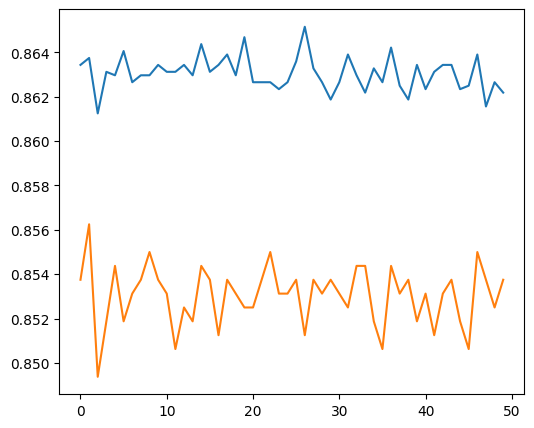

In [65]:
plt.figure(figsize=(6, 5))
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val_acc')

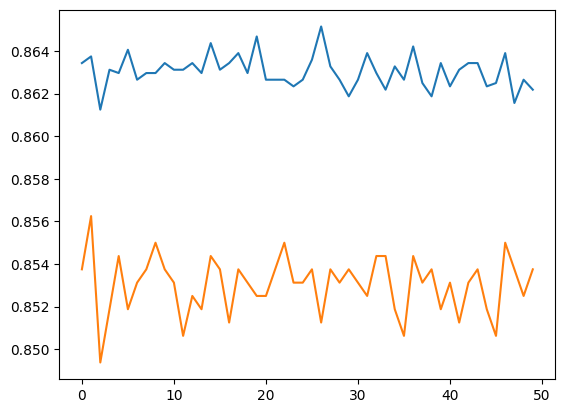

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [55]:
history.history

{'loss': [0.3410038948059082,
  0.3409164845943451,
  0.34105223417282104,
  0.3406846523284912,
  0.340806782245636,
  0.34075993299484253,
  0.3405534625053406,
  0.34058281779289246,
  0.3406864404678345,
  0.34055295586586,
  0.34046265482902527,
  0.34034767746925354,
  0.3403875529766083,
  0.3403778374195099,
  0.3402479290962219,
  0.3401836156845093,
  0.3402247726917267,
  0.34029000997543335,
  0.33974093198776245,
  0.3401077389717102,
  0.3401883542537689,
  0.3399246335029602,
  0.3399912118911743,
  0.339824378490448,
  0.33989205956459045,
  0.3400372266769409,
  0.3398161232471466,
  0.3397843539714813,
  0.3397018015384674,
  0.3396909534931183,
  0.3399941027164459,
  0.3396278917789459,
  0.3396402597427368,
  0.3396318256855011,
  0.33957234025001526,
  0.3394925594329834,
  0.33944597840309143,
  0.3394463360309601,
  0.33912068605422974,
  0.33924347162246704,
  0.3392709791660309,
  0.33906933665275574,
  0.33923789858818054,
  0.33884143829345703,
  0.339231401

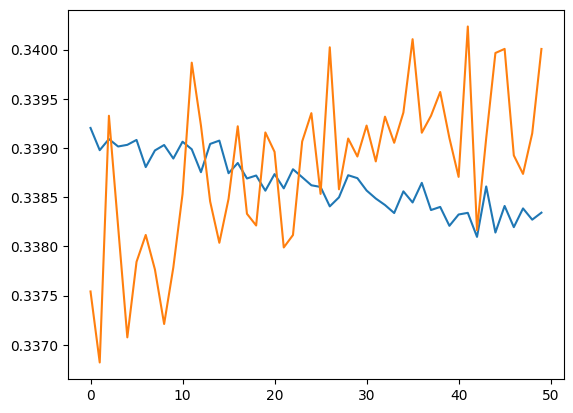

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])